In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, 
                  n_features=2,
                  centers=3, 
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

In [2]:
import matplotlib.pyplot as plt


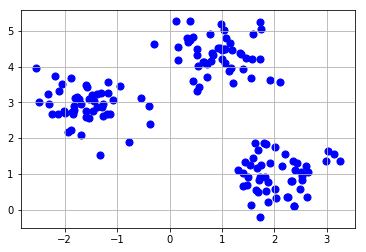

In [3]:
plt.scatter(X[:, 0], X[:,1], c='blue', marker='o', s=50)
plt.grid()
plt.show()

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(X)

In [5]:
print(y_km)

[0 2 2 2 0 2 2 0 1 2 0 1 1 2 2 1 1 0 1 0 2 0 2 2 1 0 0 2 1 0 1 1 1 1 2 0 0
 0 2 2 1 1 2 0 0 0 1 2 1 2 0 2 2 0 0 1 2 0 1 2 1 1 1 1 2 1 2 0 2 2 2 0 0 2
 0 2 2 1 1 2 0 0 2 2 0 0 0 1 1 0 0 2 0 2 0 2 1 1 0 0 0 0 1 0 0 2 1 2 2 2 1
 2 0 1 2 1 2 2 1 1 2 0 2 2 0 0 1 0 1 1 1 1 0 1 1 1 2 1 0 1 2 2 0 0 1 1 1 1
 0 0]


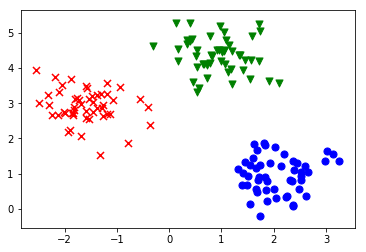

In [6]:
import numpy as np
ones = np.array([x for x, y in zip(X, y_km) if y == 1])
zeros = np.array([x for x, y in zip(X, y_km) if y == 0])
twos = np.array([x for x, y in zip(X, y_km) if y == 2])

plt.scatter(ones[:, 0], ones[:, 1], c='red', marker='x', s=50)
plt.scatter(zeros[:, 0], zeros[:, 1], c='blue', marker='o', s=50)
plt.scatter(twos[:, 0], twos[:, 1], c='green', marker='v', s=50)

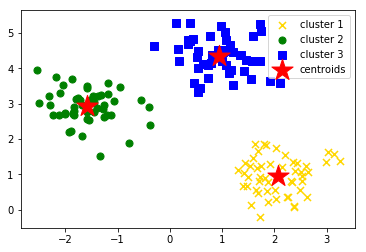

In [7]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='gold', marker='x', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='green', marker='o', label='cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c='blue', marker='s', label='cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=500, c='red', marker='*', label='centroids')
plt.legend()
            

In [8]:
print('Distortion: {0:.2f}'.format(km.inertia_))

Distortion: 72.48


[713.6998289434159, 283.46101780209307, 72.47601670996698, 62.84061768542222, 53.87202688131043, 47.03725972751367, 41.18648970744076, 35.4060703235924, 30.24685389543409, 27.76648286600629]


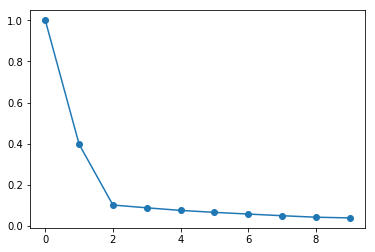

In [9]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++', 
                n_init=10,
                max_iter=300,
                random_state=0
               )
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(distortions/max(distortions), marker='o')
print(distortions)

In [10]:
print(max(distortions))
d1 = [x2 - x1 for x2, x1 in zip(distortions[:-1], distortions[1:])]

713.6998289434159


In [11]:
print(d1)

[430.23881114132286, 210.98500109212608, 9.635399024544768, 8.968590804111784, 6.834767153796761, 5.850770020072915, 5.780419383848354, 5.159216428158313, 2.4803710294278005]


In [12]:
relativeD2 = [(x1 - x2)/x1 for x1, x2 in zip(distortions[:-1], distortions[1:])]
relativeD2

[0.6028287995784757,
 0.7443175175481508,
 0.1329460345910497,
 0.14271964748991192,
 0.12687042885642594,
 0.12438586035764755,
 0.1403474640569833,
 0.1457155900388226,
 0.08200426523706073]

In [13]:
elbow = relativeD2.index(max(relativeD2)) + 2
print(elbow)



3


In [14]:
km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(X)

3
(0.0, 0.0, 0.5, 1.0)
(0.0, 0.8333333333333334, 1.0, 1.0)
(1.0, 0.9012345679012348, 0.0, 1.0)


([<matplotlib.axis.YTick at 0x7fd4d66cec88>,
 <a list of 3 Text yticklabel objects>)

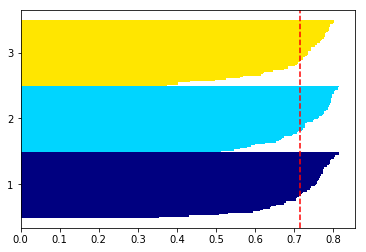

In [15]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
print(n_clusters)
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_vals.sort()
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    print(color)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color
            )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
    
    

In [16]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['id0', 'id1', 'id2', 'id3', 'id4']
X = np.random.random_sample([5,3])*10
print(X)


[[6.96469186 2.86139335 2.26851454]
 [5.51314769 7.1946897  4.2310646 ]
 [9.80764198 6.84829739 4.80931901]
 [3.92117518 3.43178016 7.29049707]
 [4.38572245 0.59677897 3.98044255]]


In [17]:
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
id0,6.964692,2.861393,2.268515
id1,5.513148,7.194690,4.231065
id2,9.807642,6.848297,4.809319
id3,3.921175,3.431780,7.290497
id4,4.385722,0.596779,3.980443


In [20]:
from scipy.spatial.distance import pdist, squareform

In [23]:
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), 
                        columns=labels, index=labels
                       )
row_dist


,id0,id1,id2,id3,id4
id0,0.000000,4.973534,5.516653,5.899885,3.835396
id1,4.973534,0.000000,4.347073,5.104311,6.698233
id2,5.516653,4.347073,0.000000,7.244262,8.316594
id3,5.899885,5.104311,7.244262,0.000000,4.382864
id4,3.835396,6.698233,8.316594,4.382864,0.000000


In [24]:
pdist(df, metric='euclidean')

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [28]:
squareform([1,1,1,1,1,1])

array([[0, 1, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 0]])

In [29]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [30]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

In [31]:
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [32]:
pd.DataFrame(row_clusters,
             columns=['row label 1', 
                      'row label 2',
                      'distance', 
                      'no. of items in clust.'
                     ],
             index=['cluster %d' %(i + 1) for i in range(row_clusters.shape[0])]                                          
            )


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


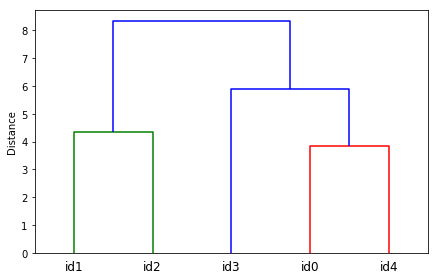

In [33]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, 
                       labels=labels,                                        
                      )
plt.tight_layout()
plt.ylabel('Distance')
plt.show()

In [34]:
row_dendr

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 4.3470733871677325, 4.3470733871677325, 0.0],
  [0.0, 3.835395554137081, 3.835395554137081, 0.0],
  [0.0, 5.899885039085129, 5.899885039085129, 3.835395554137081],
  [4.3470733871677325, 8.31659366611402, 8.31659366611402, 5.899885039085129]],
 'ivl': ['id1', 'id2', 'id3', 'id0', 'id4'],
 'leaves': [1, 2, 3, 0, 4],
 'color_list': ['g', 'r', 'b', 'b']}

[Text(0, 0, ''),
 Text(0, 0, 'id4'),
 Text(0, 0, 'id0'),
 Text(0, 0, 'id3'),
 Text(0, 0, 'id2'),
 Text(0, 0, 'id1')]

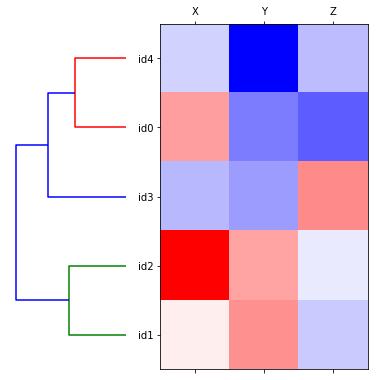

In [69]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='bwr')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))


In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
labels

array([0, 1, 1, 0, 0])

In [72]:
from sklearn.datasets import make_moons

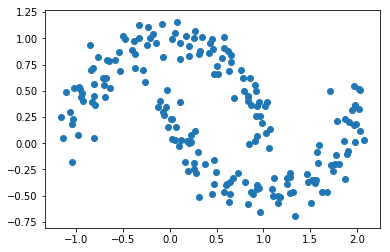

In [148]:
X, y = make_moons(n_samples=200,
                  noise=0.10,
                  random_state=0
                 )
plt.scatter(X[:, 0], X[:, 1])

KMeans time: 0.0176 seconds
AC time: 0.0011 seconds
DBSCAN time: 0.0015 seconds


Text(0.5, 1.0, 'DBSCAN')

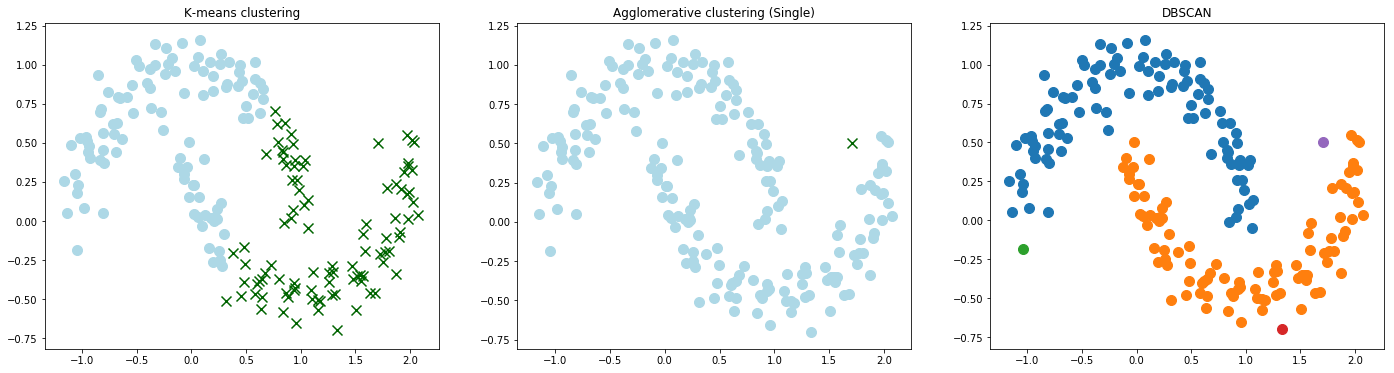

In [153]:
import time

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

km = KMeans(n_clusters=2, random_state=0)
start = time.time()
y_km = km.fit_predict(X)
end = time.time()
print("KMeans time: {:.4f} seconds".format(end - start))

ax1.scatter(X[y_km==0, 0], X[y_km==0, 1], c='lightblue', marker='o', s=100, label='cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1], c='darkgreen', marker='x', s=100, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
start = time.time()
y_ac = ac.fit_predict(X)
end = time.time()
print("AC time: {:.4f} seconds".format(end - start))

ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], c='lightblue', marker='o', s=100, label='cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], c='darkgreen', marker='x', s=100, label='cluster 2')
ax2.set_title('Agglomerative clustering (Single)')

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=1, metric='euclidean')
start = time.time()
y_db = db.fit_predict(X)
end = time.time()
print("DBSCAN time: {:.4f} seconds".format(end - start))


for i in range(len(set(y_db))):
    ax3.scatter(X[y_db==i, 0], X[y_db==i, 1], s=100, label='cluster {}'.format(i))
    
ax3.set_title('DBSCAN')
#plt.legend()